## Import Data ##

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import *
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

device = "mps" if torch.mps.is_available() else "cpu"
print(device)
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

mps


In [4]:
files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [6]:
#Standardize data, helpful for linear regression and Neural Networks

copy_df = df.copy()

for column in copy_df.columns:
    copy_df[column] = copy_df[column]/copy_df[column].abs().max()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.0
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.0
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.0
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.0
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.000030,0.0
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0.0
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0.0
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.000389,0.0


In [8]:
def drop():
    global X
    global y
    
    X = copy_df.drop(columns=["Class"])
    y = copy_df["Class"]

drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.0
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.0
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.0
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.0
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.000030,0.0
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0.0
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0.0
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.000389,0.0


## Data Clean Up ##

In [10]:
stats.zscore(copy_df) #Find outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


In [12]:
#Drop outliers
z = np.abs(stats.zscore(copy_df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
copy_df = copy_df.drop(outliers)
copy_df = copy_df.reset_index(drop=True)
copy_df.shape

(246943, 31)

In [14]:
copy_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
copy_df = copy_df.dropna() #drop rows with missing values
copy_df = copy_df.reset_index(drop=True)

In [16]:
copy_df.duplicated().sum()

764

In [18]:
copy_df = copy_df.drop_duplicates() #drop duplicate rows
copy_df = copy_df.reset_index(drop=True)

In [20]:
drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.0
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.0
2,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.0
3,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0.0
4,0.000012,-0.007552,0.013209,0.023613,-0.009970,0.003701,-0.000406,0.003949,0.003555,-0.036465,...,-0.005979,-0.051204,-0.000589,-0.081017,-0.022611,0.030112,0.008030,0.002395,0.000143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246174,0.999954,0.036158,-0.002410,-0.024766,0.013901,-0.000077,-0.009912,0.000141,-0.001615,0.027919,...,-0.007696,-0.065600,0.006649,-0.078474,-0.030655,0.057178,-0.002557,-0.002218,0.000104,0.0
246175,0.999959,0.002133,0.012803,-0.011299,-0.044153,0.009937,-0.003219,0.006740,0.001572,-0.013085,...,-0.009021,-0.073951,0.001124,0.022423,-0.042336,0.035276,0.006894,0.002033,0.000105,0.0
246176,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0.0
246177,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0.0


## Statistical Modeling ##

In [22]:
copy_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,...,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.000000,246179.0
mean,0.548832,0.005389,0.000458,0.002094,-0.003759,-0.000029,-0.001242,0.000244,0.000995,-0.002418,...,-0.000536,0.000100,-0.000079,0.000557,0.001042,-0.000948,0.000218,0.000144,0.002512,0.0
std,0.273767,0.024942,0.013661,0.026635,0.075192,0.008970,0.014975,0.006440,0.007348,0.062662,...,0.009159,0.062081,0.006118,0.127188,0.044741,0.131368,0.006602,0.004286,0.004322,0.0
min,0.000000,-0.104102,-0.068045,-0.093836,-0.251403,-0.036183,-0.053606,-0.030413,-0.048796,-0.211143,...,-0.062639,-0.199124,-0.041458,-0.396307,-0.151875,-0.409578,-0.038284,-0.029217,0.000000,0.0
25%,0.314332,-0.013513,-0.007664,-0.016028,-0.049784,-0.005845,-0.010554,-0.004214,-0.002560,-0.040141,...,-0.006369,-0.049613,-0.003413,-0.075338,-0.029338,-0.091197,-0.002087,-0.001461,0.000210,0.0
50%,0.484079,0.007160,0.000735,0.004815,-0.002395,-0.000613,-0.004307,0.000418,0.000317,-0.003925,...,-0.000900,0.000352,-0.000293,0.008888,0.002070,-0.014040,-0.000003,0.000306,0.000794,0.0
75%,0.806745,0.025171,0.010134,0.021713,0.039775,0.004823,0.003735,0.004550,0.004082,0.035214,...,0.004915,0.047108,0.002974,0.093614,0.033517,0.064090,0.002482,0.001962,0.002732,0.0
max,1.000000,0.043521,0.068081,0.084877,0.251679,0.036397,0.054523,0.030768,0.048916,0.211301,...,0.063218,0.198785,0.041749,0.302623,0.151895,0.411183,0.038303,0.029221,0.032621,0.0


In [24]:
copy_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.182522,-0.018463,-0.527492,-0.135294,0.229666,-0.093317,0.121022,-0.082286,0.025367,...,0.093035,0.139527,0.123531,-0.018612,-0.256096,-0.062420,-0.008314,-0.054709,-0.025560,NaN
V1,0.182522,1.000000,-0.386398,-0.461823,0.165421,-0.161195,-0.029621,-0.274597,-0.275760,0.177286,...,-0.062538,-0.042986,0.097750,0.007964,0.081581,-0.001099,-0.038247,-0.032783,-0.082261,NaN
V2,-0.018463,-0.386398,1.000000,0.063077,0.181368,0.314689,-0.089386,0.470159,0.075839,-0.033766,...,-0.086219,-0.040550,-0.118867,0.029930,-0.070908,0.001281,0.083208,0.127522,-0.522537,NaN
V3,-0.527492,-0.461823,0.063077,1.000000,0.075379,-0.316019,0.017158,-0.087031,0.059607,-0.026377,...,-0.044901,-0.025088,-0.099854,0.000697,0.012315,-0.024518,0.064826,0.059188,-0.070793,NaN
V4,-0.135294,0.165421,0.181368,0.075379,1.000000,-0.006597,-0.000291,0.067242,-0.025983,0.130905,...,0.023289,-0.002818,0.033708,0.000490,0.060482,-0.047891,-0.026921,-0.008408,0.007650,NaN
V5,0.229666,-0.161195,0.314689,-0.316019,-0.006597,1.000000,0.260448,0.422120,0.003033,-0.055494,...,-0.006244,-0.021596,-0.102102,-0.007412,0.013710,-0.000826,0.019567,0.007288,-0.294788,NaN
V6,-0.093317,-0.029621,-0.089386,0.017158,-0.000291,0.260448,1.000000,-0.277921,0.428030,0.029717,...,-0.005292,0.001350,-0.021818,-0.043729,0.018607,-0.009672,0.019889,-0.022325,0.113611,NaN
V7,0.121022,-0.274597,0.470159,-0.087031,0.067242,0.422120,-0.277921,1.000000,-0.316511,-0.097841,...,0.024764,-0.019610,-0.097962,0.009088,-0.022477,-0.000920,-0.016861,0.020143,0.126526,NaN
V8,-0.082286,-0.275760,0.075839,0.059607,-0.025983,0.003033,0.428030,-0.316511,1.000000,0.005975,...,0.107783,-0.005588,0.070901,-0.018885,-0.083478,0.004848,0.071352,0.017623,-0.050999,NaN
V9,0.025367,0.177286,-0.033766,-0.026377,0.130905,-0.055494,0.029717,-0.097841,0.005975,1.000000,...,-0.014072,0.031969,0.059641,-0.001891,-0.044453,0.039989,0.014618,-0.056704,-0.029375,NaN


In [26]:
kstest(X, "norm").pvalue #p-value for each row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

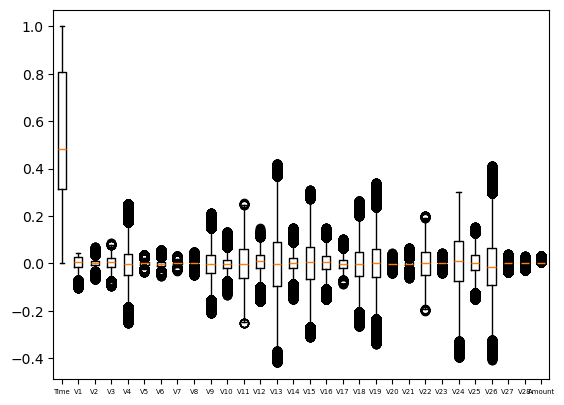

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

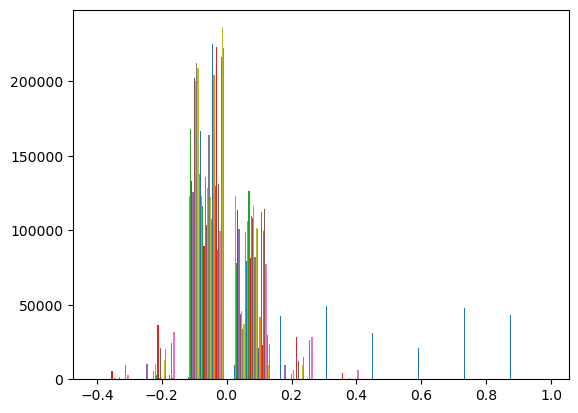

In [30]:
plt.hist(X)
plt.show()

## Training Model ##

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [39]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(172325, 30)
(36927, 30)
(36927, 30)


In [59]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
        self.y = torch.tensor(np.array(y), dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [61]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [65]:
train_dataloader = DataLoader(training_data, batch_size = 37, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 37, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 37, shuffle = True)

In [67]:
Hidden_Neurons = 100

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], Hidden_Neurons)
        self.linear = nn.Linear(Hidden_Neurons, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        #Forward Propagation
        x = x.to(device)
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [69]:
summary(model, (X.shape[1],), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1]                       --
├─Linear: 1-1                            [100]                     3,100
├─Linear: 1-2                            [1]                       101
├─Sigmoid: 1-3                           [1]                       --
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.31
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

In [71]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [73]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        #Back Propagation
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)
        
            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc
        
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100, 4))

    print(f'''Epoch no. {epoch+1} 
    Training Loss: {round(total_loss_train/1000, 4)} 
    Training Accuracy: {round(total_acc_train/training_data.__len__()*100, 4)} 
    Validation Loss: {round(total_loss_val/1000, 4)} 
    Validation Accuracy: {round(total_acc_val/validation_data.__len__()*100, 4)}''')

    print("="*50)

Epoch no. 1 
    Training Loss: 0.0424 
    Training Accuracy: 99.9994 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 2 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 3 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 4 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 5 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 6 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 7 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epoch no. 8 
    Training Loss: 0.0 
    Training Accuracy: 100.0 
    Validation Loss: 0.0 
    Validation Accuracy: 100.0
Epo

## Post-Training Analysis ##

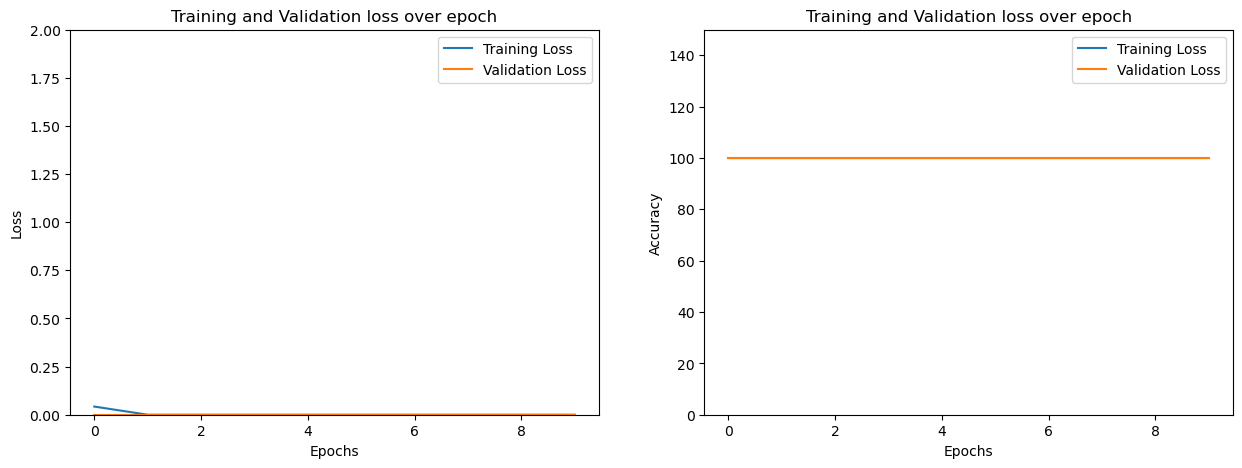

In [75]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over epoch")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = "Training Loss")
axs[1].plot(total_acc_validation_plot, label = "Validation Loss")
axs[1].set_title("Training and Validation loss over epoch")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,150])
axs[1].legend()

plt.show()